# histogram of each continuous variable 
-salaries statistics
-use describe , for each one of the feature
-short description of each feature
-bar plot for each catogarical feature
-describe the problem that you want to solve
-descriotion of the project. 




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


##   Input variables:
##### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: amount of balance in the account 

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone') 

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

##### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
  
Comment:
duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a 
realistic predictive model.



##### Output variable (desired target):
17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')




"""
    - #X,Y label on histogram
    - add a title for each chart
    - weather there is a relationship between the feature and the dependent variable 
    - logistic regression , try to predict the logistics regression with the job 
   
   - Histogram for Continuous and Quantitive variables like - balance,duration,age
   
   - Box plot for Continuous and Quantitive variables like - balance,duration,age
   
   - Bar Chart or Count Plot for Categorical variables such as 
        job,marital,education,default,housing,loan,campaign,deposit,day 
   
   - Heatmap correlation
"""

In [8]:
bankcampaigns = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Project_1/bank.csv')


bankcampaigns['deposit_nm'] = bankcampaigns['deposit'].map({'yes': 1, 'no': 0})
#removing the duration column based on the comment above
#bankcampaigns = bankcampaigns.drop('duration',1,inplace=True)

In [9]:
bankcampaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
age           11162 non-null int64
job           11162 non-null object
marital       11162 non-null object
education     11162 non-null object
default       11162 non-null object
balance       11162 non-null int64
housing       11162 non-null object
loan          11162 non-null object
contact       11162 non-null object
day           11162 non-null int64
month         11162 non-null object
duration      11162 non-null int64
campaign      11162 non-null int64
pdays         11162 non-null int64
previous      11162 non-null int64
poutcome      11162 non-null object
deposit       11162 non-null object
deposit_nm    11162 non-null int64
dtypes: int64(8), object(10)
memory usage: 1.5+ MB


In [3]:
bankcampaigns.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


In [91]:
bankcampaigns.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [11]:
#Check some middle rows to see if there is any data issues
bankcampaigns.iloc[300:350,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm
300,36,blue-collar,divorced,secondary,no,638,yes,no,unknown,16,jun,1395,2,-1,0,unknown,yes,1
301,48,unemployed,single,tertiary,no,3229,no,no,unknown,16,jun,1089,1,-1,0,unknown,yes,1
302,51,management,single,secondary,no,1610,yes,no,unknown,16,jun,1248,3,-1,0,unknown,yes,1
303,51,blue-collar,married,secondary,no,33,no,yes,unknown,16,jun,721,3,-1,0,unknown,yes,1
304,46,technician,married,secondary,no,536,yes,no,unknown,16,jun,750,2,-1,0,unknown,yes,1
305,37,management,married,tertiary,no,0,no,no,unknown,16,jun,637,6,-1,0,unknown,yes,1
306,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes,1
307,47,management,married,secondary,no,2892,no,no,unknown,17,jun,556,1,-1,0,unknown,yes,1
308,40,technician,divorced,tertiary,no,0,no,no,unknown,17,jun,522,1,-1,0,unknown,yes,1
309,38,student,single,tertiary,no,3316,no,no,unknown,17,jun,1345,3,-1,0,unknown,yes,1


In [6]:
bankcampaigns.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit_nm,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


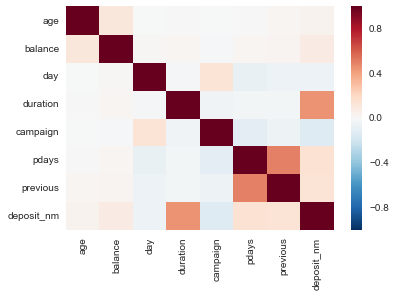

In [48]:
sns.heatmap(bankcampaigns.corr())

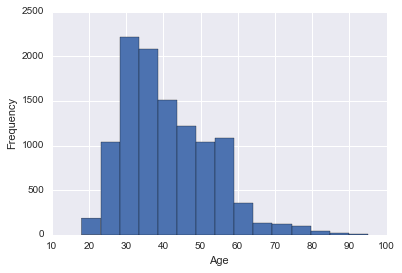

In [11]:


ax = bankcampaigns['age'].plot(kind='hist', bins=15)
ax.set_xlabel("Age")



age
deposit_nm                
0          mean  40.837391
           std   10.264815
1          mean  41.670070
           std   13.497781

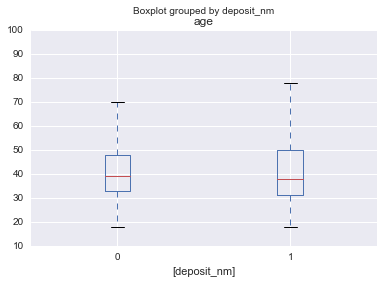

In [51]:
#bankcampaigns.boxplot(column=['age'],by = ['deposit_nm']).set_yscale('log')
bankcampaigns.boxplot(column=['age'],by = ['deposit_nm'])
pd.DataFrame(bankcampaigns.groupby( ['deposit_nm'])['age'].describe().loc[:,['mean','std']])

In [64]:
bankcampaigns[bankcampaigns['deposit_nm']==0]['age']
bankcampaigns[bankcampaigns['deposit_nm']==1]['age']

5289     57
5290     45
5291     48
5292     34
5293     37
5294     32
5295     35
5296     31
5297     54
5298     52
5299     29
5300     34
5301     37
5302     66
5303     33
5304     60
5305     55
5306     34
5307     52
5308     29
5309     43
5310     57
5311     32
5312     67
5313     45
5314     47
5315     31
5316     52
5317     41
5318     35
         ..
11132    32
11133    37
11134    58
11135    36
11136    31
11137    49
11138    32
11139    30
11140    55
11141    32
11142    52
11143    38
11144    60
11145    60
11146    30
11147    44
11148    32
11149    46
11150    34
11151    40
11152    34
11153    43
11154    52
11155    35
11156    34
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, dtype: int64

In [65]:
stats.ttest_ind(bankcampaigns[bankcampaigns['deposit_nm']==0]['age'],bankcampaigns[bankcampaigns['deposit_nm']==1]['age'])




Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)

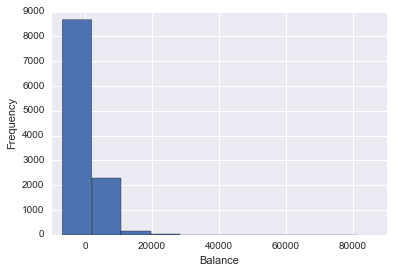

In [12]:
bal = bankcampaigns['balance'].plot(kind='hist', bins=10)
bal.set_xlabel("Balance")

,mean,std
deposit_nm,,
0,1280.227141,2933.411934
1,1804.267915,3501.104777


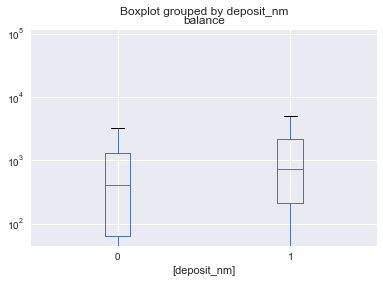

In [5]:

#---?? why is the Y axis so much out of range
#try limit the axis
#under each chart add a small discussion

bankcampaigns.boxplot(column=['balance'],by = ['deposit_nm']).set_yscale('log')
pd.DataFrame(bankcampaigns.groupby( ['deposit_nm'])['balance'].describe().loc[:,['mean','std']])

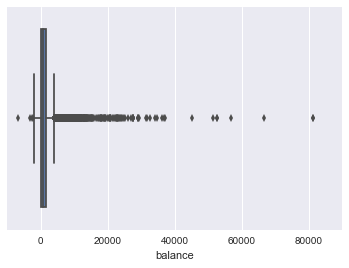

In [57]:
ax = sns.boxplot(x="balance",data=bankcampaigns)

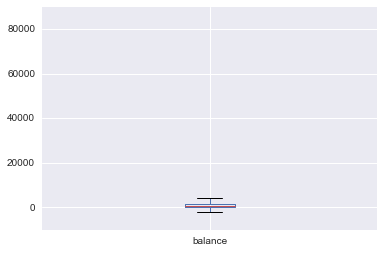

In [53]:
bankcampaigns.boxplot(column=['balance'])
#use log scale 
#images are high quality
#include a histogram

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

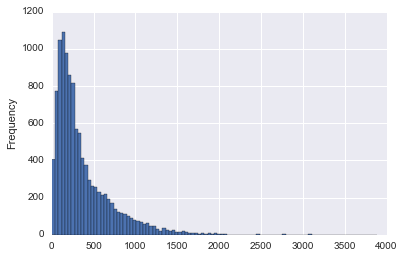

In [50]:
bankcampaigns['duration'].plot(kind='hist', bins=100)
bankcampaigns['duration'].describe()

duration
deposit_nm                 
0          mean  223.130257
           std   208.577530
1          mean  537.294574
           std   392.525262

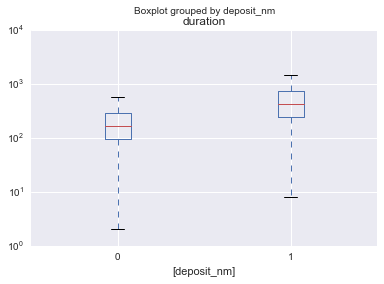

In [66]:
#----???? the red line for Mean in the boxplot for "1" looks like its below 500 but it should be at 537.294 
##why is that ?
##???????add more tics to the box plot

bankcampaigns.boxplot(column=['duration'],by = ['deposit_nm']).set_yscale('log')
pd.DataFrame(bankcampaigns.groupby( ['deposit_nm'])['duration'].describe().loc[:,['mean','std']])

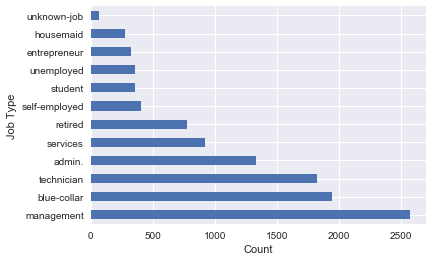

In [13]:


#sns.set_style('whitegrid')
#sns.countplot(y=bankcampaigns['job'],data=bankcampaigns,palette='RdBu_r')
#sns.countplot(y=bankcampaigns['job'],data=bankcampaigns,palette=None)

#bankcampaigns['job'] = bankcampaigns['job'].map({'unknown': 'unknown-job'})
bankcampaigns['job'].replace('unknown','unknown-job', inplace=True)

jb = bankcampaigns['job'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Job Type")

In [126]:
#bankcampaigns.groupby(['job'])[['job']].count()

bankcampaigns.groupby(['job'])[['job']].count()

,job
job,
admin.,1334
blue-collar,1944
entrepreneur,328
housemaid,274
management,2566
retired,778
self-employed,405
services,923
student,360


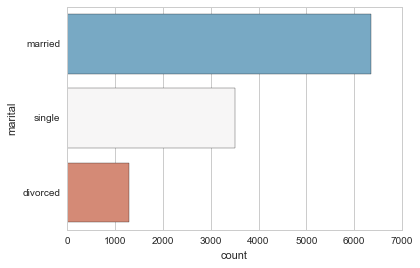

In [56]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['marital'],data=bankcampaigns,palette='RdBu_r')

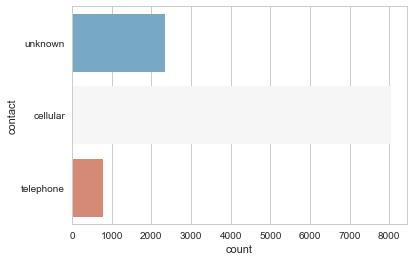

In [27]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['contact'],data=bankcampaigns,palette='RdBu_r')

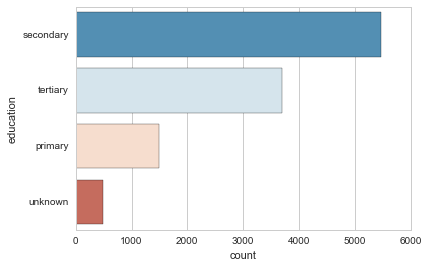

In [57]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['education'],data=bankcampaigns,palette='RdBu_r')

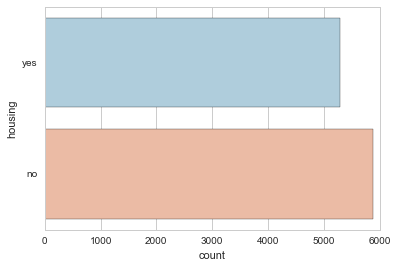

In [58]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['housing'],data=bankcampaigns,palette='RdBu_r')

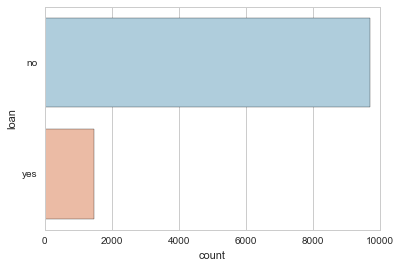

In [60]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['loan'],data=bankcampaigns,palette='RdBu_r')

Current size: [10.0, 10.0]


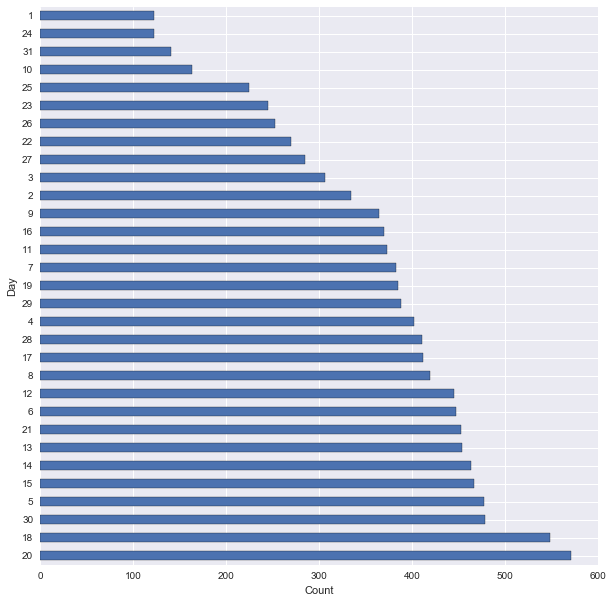

In [17]:
#Bar plot is better

#bankcampaigns['day'].plot(kind='hist', bins=10)

day = bankcampaigns['day'].value_counts().plot(kind='barh')
day.set_xlabel("Count")
day.set_ylabel("Day")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 8.0]


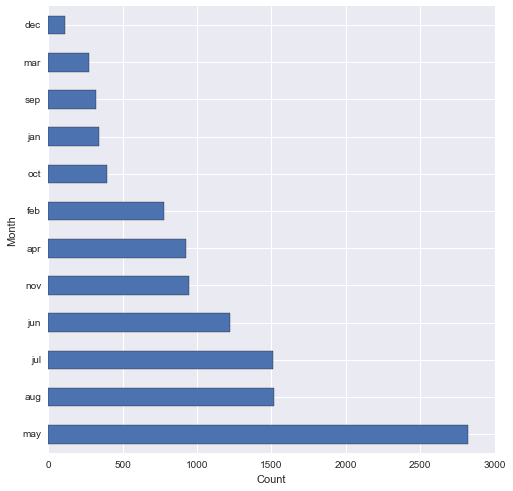

In [18]:
#sns.set_style('whitegrid')
#sns.countplot(y=bankcampaigns['month'],data=bankcampaigns,palette='RdBu_r')

month = bankcampaigns['month'].value_counts().plot(kind='barh')
month.set_xlabel("Count")
month.set_ylabel("Month")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 4
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

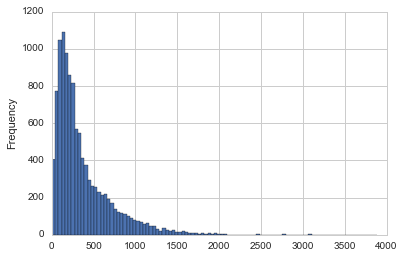

Current size: [8.0, 8.0]


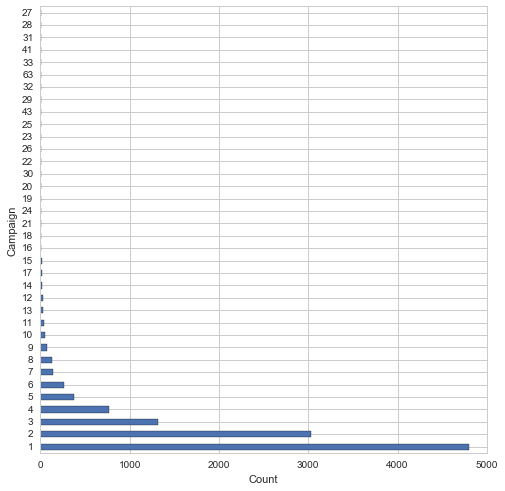

In [145]:
#bankcampaigns['campaign'].plot(kind='hist', bins=10)
#bar plot

camp = bankcampaigns['campaign'].value_counts().plot(kind='barh')
camp.set_xlabel("Count")
camp.set_ylabel("Campaign")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

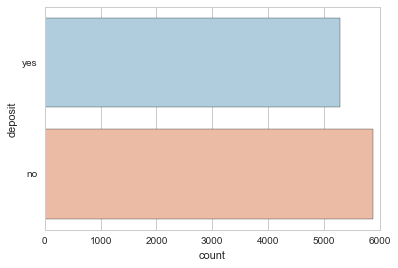

In [77]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['deposit'],data=bankcampaigns,palette='RdBu_r')
#its balanced
#change yes and no to 0 and 1 

In [43]:
#bankcampaigns['deposit_nm','deposit_numeric']
#pd.get_dummies(bankcampaigns['deposit'])
bankcampaigns['deposit_nm'] = bankcampaigns['deposit'].map({'yes': 1, 'no': 0})
bankcampaigns['deposit_nm'].describe()

count    11162.000000
mean         0.473840
std          0.499338
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit_nm, dtype: float64

In [84]:

bankcampaigns.groupby(['job'])[['deposit_nm']].mean()

,deposit_nm
job,
admin.,0.473013
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
management,0.507015
retired,0.663239
self-employed,0.461728
services,0.399783
student,0.747222


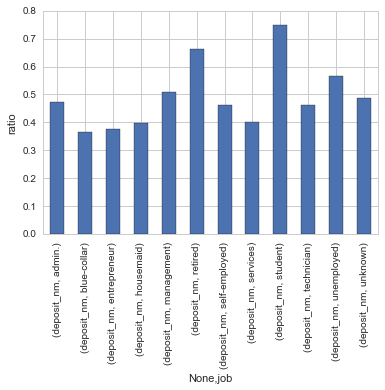

In [89]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')





In [33]:
bankcampaigns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm,intercept
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,1,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,1,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,1,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,1,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes,1,1


In [28]:

#p < 0.05 , good signal

,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,0,0,0,1,0,0,0,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,0
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,...,0,0,1,0,0,0,0,0,0,0
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,...,0,0,0,1,0,0,0,0,0,0
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,0,0,0,0,0,0,0,1,0,0
9,28,services,single,secondary,no,5090,yes,no,unknown,6,...,0,0,0,0,0,1,0,0,0,0


,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0


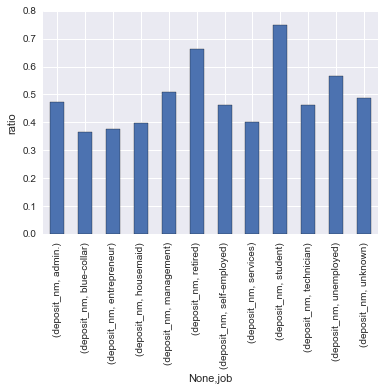

In [28]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

age
deposit_nm                
0          mean  40.837391
           std   10.264815
1          mean  41.670070
           std   13.497781

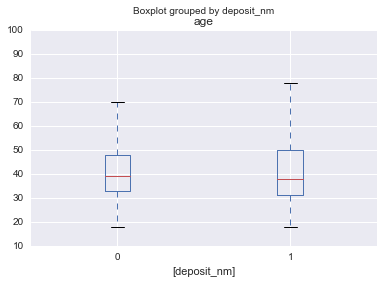

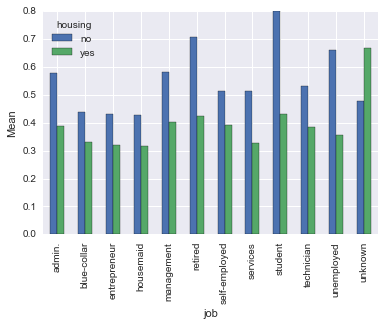

In [27]:
#bankcampaigns.groupby(['job','housing'])[['deposit_nm']].count().unstack().plot(kind='bar').set_ylabel('Count')
#bankcampaigns.groupby(['job','housing'])[['deposit_nm']].mean()
#bankcampaigns.groupby(['job','housing'])[['deposit_nm']].count().unstack().plot(kind='bar').set_ylabel('Count')

bankcampaigns.groupby(['job','housing'])['deposit_nm'].mean().unstack().plot(kind='bar').set_ylabel('Mean')

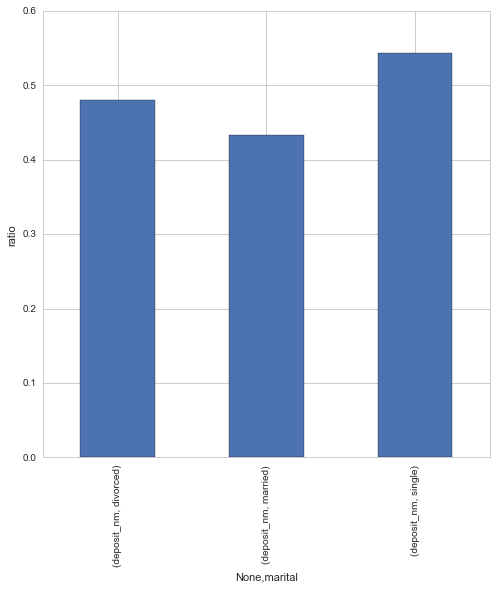

In [153]:
bankcampaigns.groupby(['marital'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [162]:

pd.DataFrame(bankcampaigns.groupby( ['marital'])['deposit_nm'].describe().loc[:,['mean','std']])

deposit_nm
marital                  
divorced mean    0.481052
         std     0.499834
married  mean    0.433790
         std     0.495636
single   mean    0.543491
         std     0.498176

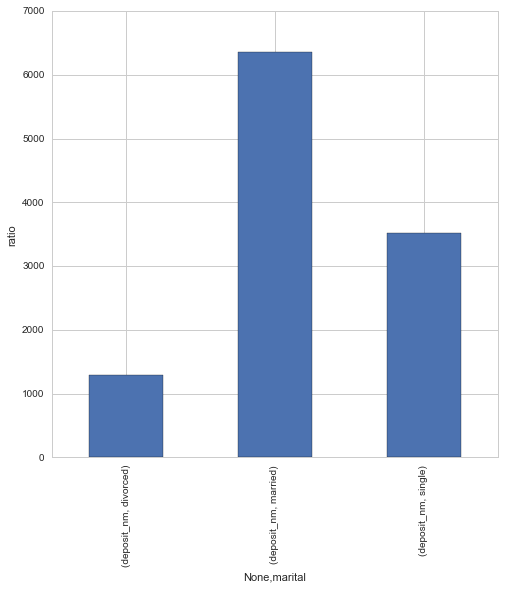

In [163]:
bankcampaigns.groupby(['marital'])[['deposit_nm']].count().unstack().plot(kind='bar').set_ylabel('ratio')

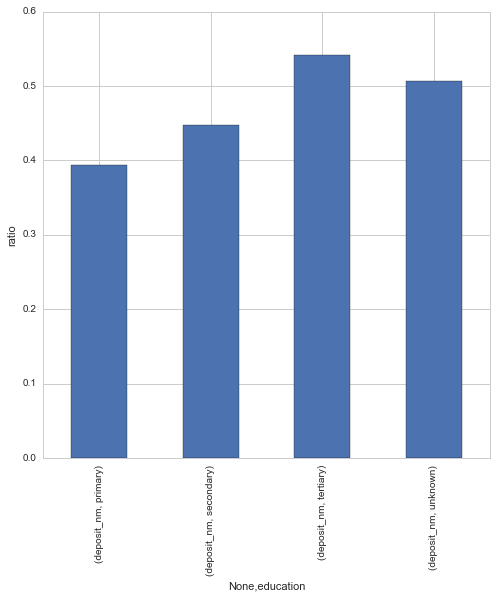

In [165]:
bankcampaigns.groupby(['education'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [166]:
pd.DataFrame(bankcampaigns.groupby( ['education'])['deposit_nm'].describe().loc[:,['mean','std']])

deposit_nm
education                 
primary   mean    0.394000
          std     0.488798
secondary mean    0.447407
          std     0.497272
tertiary  mean    0.541068
          std     0.498378
unknown   mean    0.507042
          std     0.500454

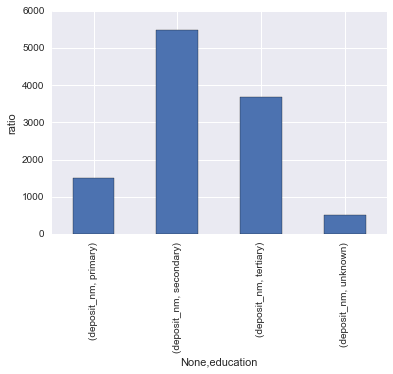

In [44]:
bankcampaigns.groupby(['education'])[['deposit_nm']].count().unstack().plot(kind='bar').set_ylabel('ratio')

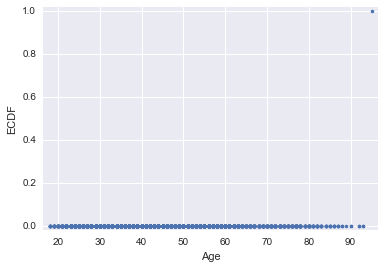

In [40]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(bankcampaigns['age'])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
#??????????send the link for ecdf and notebook and data set

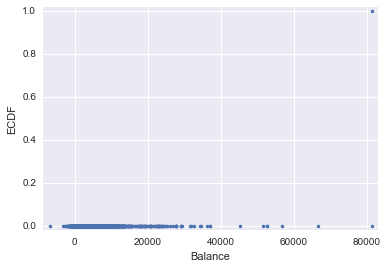

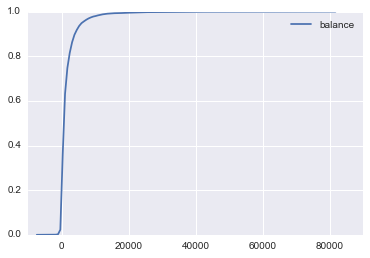

In [69]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(bankcampaigns['balance'])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Balance')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


sns.kdeplot(bankcampaigns['balance'],cumulative=True)

In [15]:
bankcampaigns_new = bankcampaigns.join(pd.get_dummies(bankcampaigns['job']))
bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['marital']))
#???????Education has some unknown, how do we take it out so that we can just have primary,secondary,ternary

#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['education']))

#??????Housing has yes,no,unknown and loan also have yes,no,unknown so how do we seperate them while using
#getdummies()
bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['housing']))
#??????how do I drop unknown from Contact since its conflicting with other unknown
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['contact']))
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['loan']))
bankcampaigns_new.drop('job', axis = 1, inplace = True)
bankcampaigns_new.drop('marital', axis = 1, inplace = True)
bankcampaigns_new.drop('housing', axis = 1, inplace = True)

list(bankcampaigns_new.columns.values)

['age',
 'education',
 'default',
 'balance',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit',
 'deposit_nm',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown-job',
 'divorced',
 'married',
 'single',
 'no',
 'yes']

In [25]:
bankcampaigns_new['intercept'] = 1
#bankcampaigns = bankcampaigns.join(pd.get_dummies(bankcampaigns['job']))
#bankcampaigns['ab_page'] = pd.get_dummies(bankcampaigns['job'])
import statsmodels.api as sm
logit = sm.Logit(bankcampaigns_new['deposit_nm'], bankcampaigns_new[['intercept', 'entrepreneur','housemaid','management']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.690377
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             deposit_nm   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11158
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Apr 2018   Pseudo R-squ.:                0.002024
Time:                        22:41:36   Log-Likelihood:                -7706.0
converged:                       True   LL-Null:                       -7721.6
                                        LLR p-value:                 7.489e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.1207      0.022     -5.388      0.000      -0.165      -0.077
entrepreneur    -0.3901      0.116     -3.356      0.001      -0.618      -0.162
housemaid       -0.2939      0.125     -2.342      0.019      -0.540      -0.048
management       0.1488      0.045      3.277      0.001       0.060       0.238
================================================================================
"""


"""
    -t-test will not work for deposit_nm but Chi_square test will work.

    -chi_aquare will give you "p_value" , p<0.05 is a good signal

    -Age - statistical test , t-test

    -t-test
      -dont want to include the feature in the model
      -contribute or not to the performance of the model.
      
    -Numerical variables - T-Test
    -Categorical variables - Chi-square Test
    
    
    
    -????? Not sure what we are looking for in chi-square test , there are two uses of Chi-square test as shown
    below, which one are we looking for. 
    
    1>it tests whether the distribution of sample categorical data matches an expected distribution.
    For example, you could use a chi-squared goodness-of-fit test to check whether the race 
    demographics of members
    at your church or school match that of the entire U.S. population or whether the computer browser preferences
    of your
    friends match those of Internet uses as a whole.
    
    
    2>The chi-squared test of independence tests whether two categorical variables are independent. 
    The test of independence is commonly used to determine whether variables like education, political views 
    and other preferences vary based on demographic factors like gender, race and religion. Let's generate some
    fake voter polling data and perform a test of independence:
    
    
    age -> deposit_nm , will need a t-test
    
    
"""

#1>dummy
#2>train test split
#3>traint the model
#4>predict
#5>measure the performance between predicted data and test data


#descision tree - dont need lot of pre-processing 
#change the parameter into dummy variable 
#combine very simple models into boosting model , not overfitting
#pandas.getdummies
#each feature that is not-numerical - use getdummies for example Job,marital status
#use join 
#keep the original data and just create copy of the data before starting the getdummies()
#include the new columns in the data set , remove the old columns - use join


#seperate data into training and testing - 80% train and 20% test
#perform cross validation on 80%
#tune the model using cross-validation 
#depths of the descision tree is a tuning parameter
#test the model on the test set


In [16]:
from sklearn.model_selection import train_test_split


X = bankcampaigns_new[['age','entrepreneur','housemaid','management','divorced','married','single','yes','no']]
                  
y = bankcampaigns_new['deposit_nm']

#80% for training and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)







In [17]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Prediction and evaluation

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.59      0.84      0.69      1181
          1       0.66      0.35      0.46      1052

avg / total       0.62      0.61      0.58      2233



In [43]:
print(confusion_matrix(y_test,predictions))

[[847 334]
 [557 495]]


from x train and y train take 5% take the training set , from training set take 5% from training set , 
do the trainign with 5% of the data

20% of test which we already have

5% of x-train for training - 20% - performance value
10% of x-train for training - 20% - performance value
15% 
30%
60%
70%
80%


### num of samples to performance map 

